### Corona Virus Data Analyst March 2020

Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. 

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.

Resources : WHO

This data analysis is focused on data wrangling, data cleaning and data visulization of Corona Virus on 8th March 2020.

The dataset is derived from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE. 

Here is the link consisting of all datased regarding Coronavirus

https://github.com/CSSEGISandData/COVID-19

1 - Determine which libraries is used for dataset

In [989]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

2 - Load data from csv file defined in the link repository (last 7 days)

In [990]:
corona_week_array = []
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'


for i in range(10,17):
    if(i<10):
        dataset_date = "03-0" + str(i) + "-2020.csv"
    else:
        dataset_date = "03-" + str(i) + "-2020.csv"
    url = path + dataset_date
    corona_data_df = pd.read_csv(url, error_bad_lines=False, encoding = "utf-8" , header=0)
    corona_week_array.append(corona_data_df.copy()) ## deep copy

corona_data_week_df = pd.concat(corona_week_array,axis=0, ignore_index=True)

3 - Get first 5 values from dataframe whose name is corona_data_df

In [991]:
corona_data_week_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000


4 - Get last 5 values from corona_data_df dataframe

In [992]:
corona_data_week_df.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
1644,Cayman Islands,United Kingdom,2020-03-16T14:53:04,1,1,0,19.3133,-81.2546
1645,Gibraltar,United Kingdom,2020-03-14T16:33:03,1,0,1,36.1408,-5.3536
1646,From Diamond Princess,Australia,2020-03-14T02:33:04,0,0,0,35.4437,139.6380
1647,West Virginia,US,2020-03-10T02:33:04,0,0,0,38.4912,-80.9545
1648,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0,0,0,31.9522,35.2332


5 - Show descriptive statistics of corona_data_df dataframe

In [993]:
corona_data_week_df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,620.421468,23.278351,301.229836,28.923884,8.012910
std,4681.297561,221.497046,3369.067953,22.195298,82.802965
min,0.000000,0.000000,0.000000,-41.454500,-157.498337
25%,4.000000,0.000000,0.000000,19.195900,-74.297300
50%,19.000000,0.000000,0.000000,35.443700,12.457800
75%,113.000000,1.000000,4.000000,43.452500,88.092400
max,67798.000000,3099.000000,55142.000000,71.706900,174.886000


6 - Determine how many rows and columns there are in corona_data_df dataframe

In [994]:
corona_data_df_count_row = corona_data_week_df.shape[0]  # gives number of row count
corona_data_df_count_col = corona_data_week_df.shape[1]  # gives number of col count
print("Corona Dataset : {} rows and {} columns "
      .format(corona_data_df_count_row,corona_data_df_count_col))

Corona Dataset : 1649 rows and 8 columns 


7 - Show data type of each column in corona_data_df dataframe

In [995]:
corona_data_week_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 8 columns):
Province/State    788 non-null object
Country/Region    1649 non-null object
Last Update       1649 non-null object
Confirmed         1649 non-null int64
Deaths            1649 non-null int64
Recovered         1649 non-null int64
Latitude          1649 non-null float64
Longitude         1649 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 103.1+ KB


8 - Check the database combined with many csv files

In [996]:
corona_data_week_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000
5,NaN,Spain,2020-03-10T23:53:02,1695,35,32,40.0000,-4.0000
6,NaN,Germany,2020-03-10T18:53:02,1457,2,18,51.0000,9.0000
7,Guangdong,Mainland China,2020-03-10T09:13:07,1353,8,1274,23.3417,113.4244
8,Henan,Mainland China,2020-03-08T05:03:02,1272,22,1247,33.8820,113.6140
9,Zhejiang,Mainland China,2020-03-10T10:33:02,1215,1,1191,29.1832,120.0934


9 - Remove time part from datetime

In [997]:
corona_data_week_df['Last Update'] = corona_data_week_df['Last Update'].astype(str).str[:-9]

10 - Remove duplicated values from dataframe

In [998]:
corona_data_week_df.drop_duplicates(inplace=True) 

10 - Rename Country/Region name to Country_Region  

In [999]:
corona_data_week_df.rename(columns={'Country/Region': 'Country_Region'}, inplace=True)

11 - Only get values based on Some Countries

In [1000]:
corona_data_week_df = corona_data_week_df.query('Country_Region == "Mainland China" or Country_Region == "US" or Country_Region == "Canada" or Country_Region == "Italy" or Country_Region == "Turkey" or Country_Region == "China" or Country_Region == "Iran" or Country_Region == "Australia" or Country_Region == "Russia" or Country_Region == "Germany" or Country_Region == "UK" or Country_Region == "United Kingdom" or Country_Region == "Spain" or Country_Region == "France"')

In [1001]:
##corona_data_week_df['Country_Region'] = np.where((corona_data_week_df.Country_Region == 'Mainland China'),'China',corona_data_week_df.Country_Region)

corona_data_week_df.loc[(corona_data_week_df.Country_Region == 'Mainland China'),'Country_Region']='China'

In [1002]:
corona_data_week_df.loc[(corona_data_week_df.Country_Region == 'UK'),'Country_Region']='United Kingdom'

12 - Show the values of Turkey

In [1003]:
corona_data_week_df[corona_data_week_df["Country_Region"] == "Turkey"]

,Province/State,Country_Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
402,NaN,Turkey,2020-03-11,1,0,0,38.9637,35.2433
720,NaN,Turkey,2020-03-11,5,0,0,38.9637,35.2433
1049,NaN,Turkey,2020-03-13,5,0,0,38.9637,35.2433
1298,NaN,Turkey,2020-03-15,6,0,0,38.9637,35.2433
1532,NaN,Turkey,2020-03-16,18,0,0,38.9637,35.2433


13 - Show the sum of Confirmed, Deaths, Recovered values in terms of Country_Region,Last Update

In [1004]:
corona_data_week_df = corona_data_week_df.groupby(['Country_Region','Last Update']).sum().sort_values(by=['Last Update'], ascending=True)

In [1005]:
corona_data_week_df = corona_data_week_df.reset_index()

In [1006]:
corona_data_week_df['Last Update'] = pd.to_datetime(corona_data_week_df['Last Update'])

In [1007]:
corona_data_week_df = corona_data_week_df[(corona_data_week_df['Last Update'] >= '2020-03-10')]

15 - Show the figure based on how the Corona virus is going and what is its situation of spread  in the last 7 days.

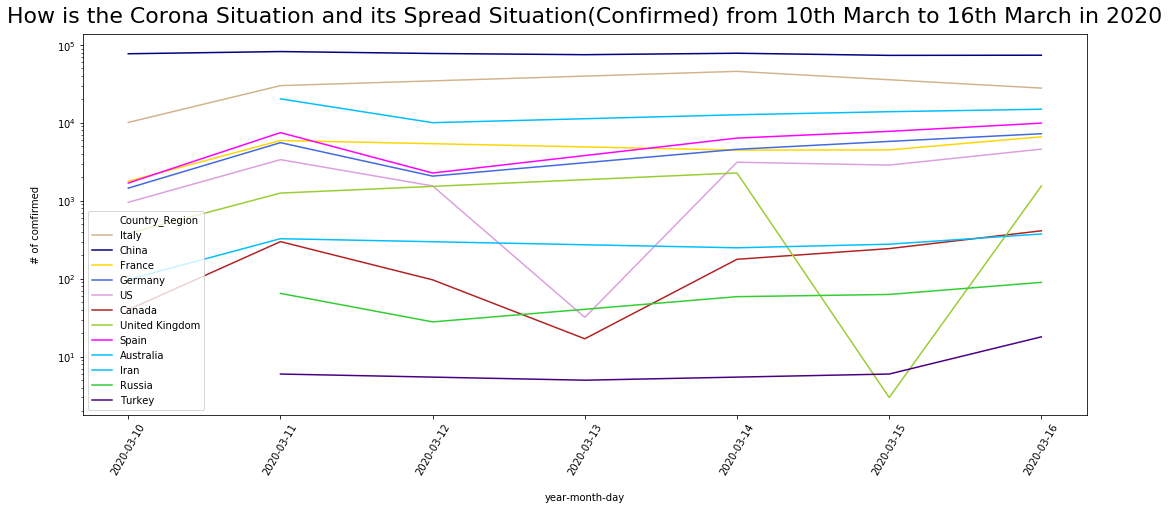

In [1008]:
plt.figure(figsize=(18,7))

my_palette = {'China':'navy', 
              'Australia':'deepskyblue',
              'Canada':'firebrick',
              'Italy':'tan',
              'France':'gold',
              'Germany':'royalblue',
              'US':'plum',
              'United Kingdom':'yellowgreen',
              'Spain':'fuchsia',
              'Iran':'deepskyblue',
              'Russia':'limegreen',
              'Turkey':'indigo'
             }

ax = sns.lineplot(data = corona_data_week_df, x='Last Update', y='Confirmed', hue='Country_Region', palette= my_palette)
plt.title('How is the Corona Situation and its Spread Situation(Confirmed) from 10th March to 16th March in 2020', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('# of comfirmed', labelpad=16)
leg = ax.legend()
ax.set_yscale('log')
plt.xticks(rotation=60);
plt.savefig('16-03-2020/image1.png')
plt.savefig('16-03-2020/image1.pdf')

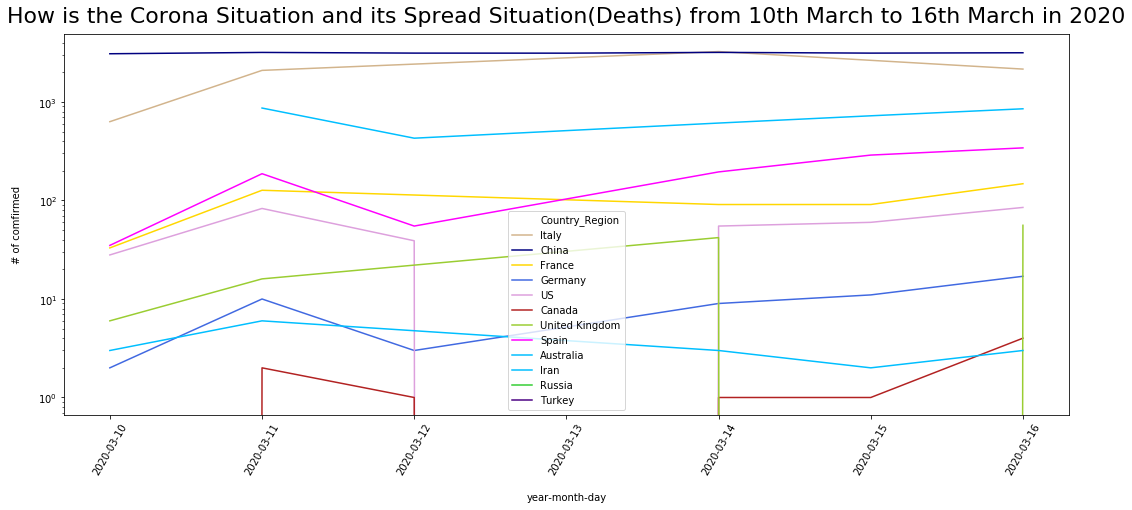

In [1009]:
plt.figure(figsize=(18,7))

my_palette = {'China':'navy', 
              'Australia':'deepskyblue',
              'Canada':'firebrick',
              'Italy':'tan',
              'France':'gold',
              'Germany':'royalblue',
              'US':'plum',
              'United Kingdom':'yellowgreen',
              'Spain':'fuchsia',
              'Iran':'deepskyblue',
              'Russia':'limegreen',
              'Turkey':'indigo'
             }

ax = sns.lineplot(data = corona_data_week_df, x='Last Update', y='Deaths', hue='Country_Region' , palette= my_palette)
plt.title('How is the Corona Situation and its Spread Situation(Deaths) from 10th March to 16th March in 2020', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('# of comfirmed', labelpad=16)
leg = ax.legend()
ax.set_yscale('log')
plt.xticks(rotation=60);
plt.savefig('16-03-2020/image2.png')
plt.savefig('16-03-2020/image2.pdf')

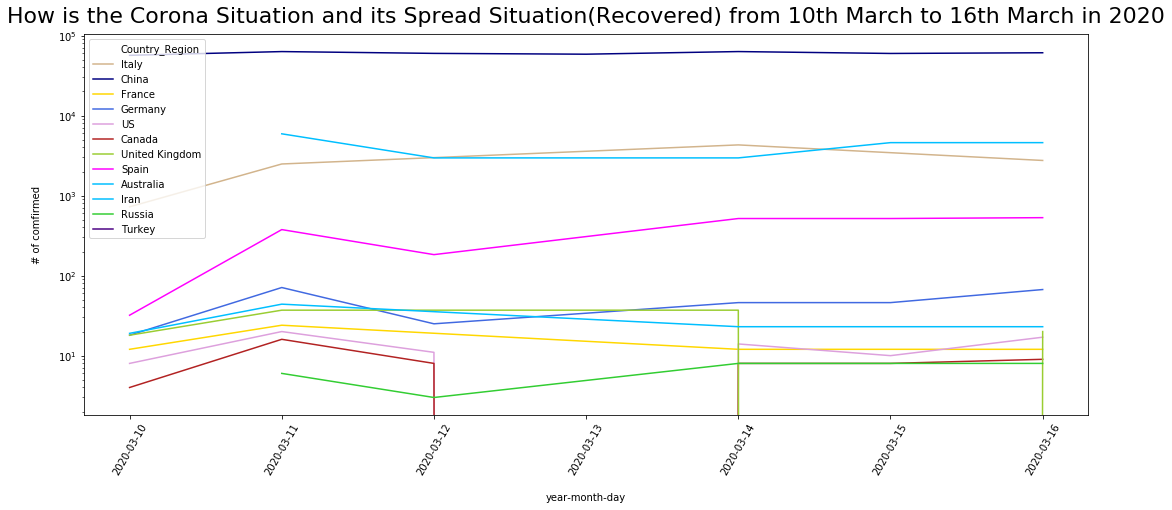

In [1010]:
plt.figure(figsize=(18,7))

my_palette = {'China':'navy', 
              'Australia':'deepskyblue',
              'Canada':'firebrick',
              'Italy':'tan',
              'France':'gold',
              'Germany':'royalblue',
              'US':'plum',
              'United Kingdom':'yellowgreen',
              'Spain':'fuchsia',
              'Iran':'deepskyblue',
              'Russia':'limegreen',
              'Turkey':'indigo'
             }

ax = sns.lineplot(data = corona_data_week_df, x='Last Update', y='Recovered', hue='Country_Region', palette= my_palette)
plt.title('How is the Corona Situation and its Spread Situation(Recovered) from 10th March to 16th March in 2020', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('# of comfirmed', labelpad=16)
leg = ax.legend()
ax.set_yscale('log')
plt.xticks(rotation=60);
plt.savefig('16-03-2020/image3.png')
plt.savefig('16-03-2020/image3.pdf')